# PhazeRo's 2023 Data Science Internship Challenge

## Instructions:
- This notebook contains three sections desinged to test your Data Science and programming knowledge.
- If you are applying for the research position, there is an additional section at the end for you.
- Please list any libraries you import or install using pip below. We have added some that might be helpful


In [524]:
# !pip install pandas numpy scikit-learn matplotlib
#!pip install seaborn
#!pip install fitter

In [73]:
import pandas as pd
import numpy as np
import re
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
#Include any additional imports you use here

## Section 1
In this section, you will have three coding questions to test your programming skills. Please Add your answers to the code block under every question, and elaborate on your thinking process and answer in the markdown block.

### Question 1: Palindrome Number

Given an integer `x`, return `true` if `x` is a [palindrome](https://en.wikipedia.org/wiki/Palindromic_number), and `false` otherwise.



- Example 1:
```
Input: x = 121
Output: true
Explanation: 121 reads as 121 from left to right and from right to left.
```
- Example 2
```
Input: x = -121
Output: false
Explanation: From left to right, it reads -121. From right to left, it becomes 121-. Therefore it is not a palindrome.
```
- Example 3:
```
Input: x = 10
Output: false
Explanation: Reads 01 from right to left. Therefore it is not a palindrome.
```
 

Constraints:

$$-2^{31} <= x <= 2^{31} - 1$$
 

Complete the function `isPalindrome(x)` below: 

In [74]:
#First Solution :
def isPalindrome(x: int) -> bool:
    for i in range(len(str(x))) :
        if str(x)[i]!=str(x)[-1-i] :
            return False
    return True


#Second Solution :

#Creating a function that calculates the number of digits of a number :
def len_nb(x: int) -> int :
        #if x<0 :
        #    return len_nb(-x)+1
        if x in range(10):
            return 1
        n=0
        while x%pow(10,n) != x: 
            n+=1
        return n


def isPalindrome2(x: int) -> bool:
    #All negative numbers are not palindromes
    if x<0 :
        return False
    #All Numbers containing only one digit are palindromes
    if len_nb(x)==1 :
        return True
    #Numbers containing more than one digit
    if len_nb(x)>1 :
        p = len_nb(x)-1
        q = x//pow(10,p)
        r = x%pow(10,p)
        if q == r%10 :
            x=r//10
            return isPalindrome2(x)
        else :
            return False
        
    
    

In [79]:
%time
isPalindrome(11211)

CPU times: total: 0 ns
Wall time: 0 ns


True

#### Code Explanation and thought process:
##### Points to consider: could you complete the above function without changing the input to string?
-The easiest way to do it using python is obiously transforming the int into a string and then use a loop to check if the string is symetric or palyndrome
-The second method consists of trying to find the number of digits of the number, I then used some maths to check if the last and the first digits are the same (In my case I did it recursively, but could be done iteratively). I've also eliminated the obvious usecases, like negative numbers which are never palindromes and numbers with one digit which are always palindroms.
PS.I could put len_nb inside isPalindrome() but It's more clear outside.

### Question 2: Contains Duplicate
Given an integer array `nums`, return `true` if any value appears at least twice in the array, and return `false` if every element is distinct.

 

- Example 1:
```
Input: nums = [1,2,3,1]
Output: true
```
- Example 2:
```
Input: nums = [1,2,3,4]
Output: false
```
- Example 3:
```
Input: nums = [1,1,1,3,3,4,3,2,4,2]
Output: true
```

Constraints:
$$ 1 <= nums.length <= 105 $$
$$ -10^9 <= nums[i] <= 10^9$$



Complete the function `containsDuplicate(nums)` below: 



In [80]:
#First solution :
def containsDuplicate(nums: list[int]) -> bool:
    return len(nums)!=len(set(nums))


#Second Solution

def containsDuplicate2(nums: list[int]) -> bool:
    dic = {}
    for n in nums :
        if n in dic.keys():
            return True
        dic[n]=1
    return False

#Third solution :
def containsDuplicate3(nums: list[int]) -> bool:
    for i in range(len(nums)-1) :
        if sorted(nums)[i] == sorted(nums)[i+1] :
            return True
    return False

In [81]:
%time
containsDuplicate([1,3,2,2,4])

CPU times: total: 0 ns
Wall time: 0 ns


True

#### Code Explanation and thought process:
A set is a data sctucture that does not contain duplicates, so if we transform a list to a set and it still has the same length, then it has no duplicates.
-Another way to do it is to iterate through the list, and use a dictionnary to store the list numbers as keys, all first stored with the value 1,and before storing the number in the dictionnary we check whether it has been stored previously or not. If yes we return True (It can be done with lists as well).
-Another method we could use is to sort the list and then check if at any moment num[i]==num[i+1].

### Question 3: Group Anagrams
Given an array of strings `strs`, group the anagrams together. You can return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 

- Example 1:
```
Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]
```
- Example 2:
```
Input: strs = [""]
Output: [[""]]
```
- Example 3:
```
Input: strs = ["a"]
Output: [["a"]]
```

Constraints:

$$1 <= strs.length <= 104$$
$$0 <= strs[i].length <= 100$$
$$\textrm{strs[i] consists of lowercase English letters.}$$

Complete the function `groupAnagrams(strs)` below:

In [82]:
def groupAnagrams(strs: list[str]) -> list[list[str]]:
    dic = {}
    for s in strs :
        x = str(sorted(s))
        if x in dic.keys() :
            dic[x].append(s)
        else :
            dic[x]=[s]
    return list(dic.values())
        

In [83]:
%time
groupAnagrams(["eat","tea","tan","ate","nat","bat"])

CPU times: total: 0 ns
Wall time: 0 ns


[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

#### Code Explanation and thought process:
-For this solution I used the fact that sorted anagrams are the same (whether they are manipulated as lists or strings). Hence, I created a dictionnary in which the keys are unique sorted anagrams, and the values are lists of the strings given, so if a sorted string is already in the dictionnary.keys(), the string itself (unsorted) is assigned to its group, else, its the first string of a new group

## Section 2
In this section, you will be working with csv files. There is a total of 3 files thay you will need to load up, clean and draw insgits from
```
- bmi.csv -> This dataset shows the mean BMI for people over 18 years old per country, and split into [Male, Female, both sexes] for each year from 1975-2016.
- gni.csv -> The Gross National Income by country, the indicator used is -GNI per capita, Atlas method (current US$), given by the code NY.GNP.PCAP.CD-. Each country is sampled per year for when the data is available.
- life_expec.csv -> Each country is given Life expectancy at birth (years), Life expectancy at age 60 (years), Healthy life expectancy (HALE) at birth (years) Healthy life expectancy (HALE) at age 60 (years), for Male, Female, and both sexes. Each country is sampled at 4 years (2000,2010,2015,2019)
```
To get more insight into the datasets, below are links to World Health Organization to describe the terms further:
- [BMI](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index)
- [GNI](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1144)
- [Life Expectancy](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index)

Reshape the datasets to look like the following figures, and display the shape of the new datasets. Answer questions regarding the resulting datasets when prompoted:

#### - ```bmi.csv```
```
          Country  Year        Both Sexes     Male     Female
0     Afghanistan  2016          23.0         22.3     23.7 
1     Afghanistan  2015          22.9         22.3     23.6 
2     Afghanistan  2014          22.8         22.2     23.5 
3     Afghanistan  2013          22.8         22.1     23.4 
4     Afghanistan  2012          22.7         22.0     23.3 
...           ...   ...           ...          ...      ...
8143     Zimbabwe  1979          22.0         20.3     23.6 
8144     Zimbabwe  1978          21.9         20.2     23.6 
8145     Zimbabwe  1977          21.9         20.2     23.5 
8146     Zimbabwe  1976          21.8         20.1     23.5 
8147     Zimbabwe  1975          21.8         20.0     23.5 
```

In [84]:
def bmi_df() -> pd.DataFrame:
    #Importing the dataset
    df = pd.read_csv("bmi.csv")

    #Droping the first 3 lines
    df=df.drop(index=[0,1,2]).reset_index(drop=True)

    #Renaming the first column to Country
    df=df.rename(columns={'Unnamed: 0':'Country'})

    #Deleting all the content into brackets :
    for c in df.columns[1:] :
        df[c]=df[c].apply(lambda x: x[:4])

    #Applying melt method and keep the index as a column so we keep track of years' order of appearance
    df=pd.melt(df,id_vars=['Country'],value_vars=df.columns[1:]).reset_index()

    #Renaming 'variable' column into 'Year'
    df=df.rename(columns={'variable':'Year'})

    #Sorting by country and by years (the same order the years where in as columns)
    df=df.sort_values(by=['Country','index'])

    #Droping 'index' column as we don't need it anymore
    df=df.drop(['index'],axis=1)

    #Reseting the index so it starts from 0
    df=df.reset_index(drop=True)

    #Deleting the .1 and .2 at the end of the years, so we have each year three times in a row
    df['Year']= df['Year'].apply(lambda x : x[:4])

    #Grouping the data by 'Country' and 'Year', and grouping numbers into a list
    #Then reset_index() to transform 'Country' and 'Year' into columns again
    df=pd.DataFrame(df.groupby(['Country','Year'],sort=False)['value'].apply(list)).reset_index()

    #Tranforming the column 'value' of lists into a data frame of three columns : ['Both Sexes','Male','Female']
    x= pd.DataFrame(df['value'].to_list(),columns=['Both Sexes','Male','Female'])

    #Combining the two datasets: 
    df=pd.concat([df,x],axis=1)

    #Droping the 'value' column at the end
    df=df.drop(['value'],axis=1)

    return df


In [85]:
#TODO: Save the generated bmi_df as a .csv format, you will be submitting it alongside the Notebook
bmi_df().to_csv("bmi_df.csv")

#### - ```life_excpec.csv:```
```
          Country   Year    Both Sexes  Male Female  Category
0     Afghanistan   2019      63.2    63.3   63.2  Life expectancy at birth 
1     Afghanistan   2019      15.2    15.4   15.1  Life expectancy at age 60 
2     Afghanistan   2019      53.9    54.7   53.2  Healthy Life expectancy at birth 
3     Afghanistan   2019      10.8    11.2   10.6  Healthy life expectancy at age 60 
4     Afghanistan   2015      61.7    61.0   62.3  Life expectancy at birth
...           ...    ...        ...   ...    ...   
2907     Zimbabwe   2010      10.5     9.3   11.3  Healthy life expectancy at age 60 
2908     Zimbabwe   2000      46.6    45.1   48.1  Life expectancy at birth 
2909     Zimbabwe   2000      14.4    11.7   17.1  Life expectancy at age 60 
2910     Zimbabwe   2000      41.0    40.4   41.8   Healthy life expectancy at birth
2911     Zimbabwe   2000      10.6     8.7   12.4  Healthy life expectancy at age 60 
```


In [87]:
def life_excpec_df() -> pd.DataFrame:
    
    #Importing the dataset
    df=pd.read_csv("life_expec.csv")

    #Droping the first 3 lines
    df=df.drop(index=[0]).reset_index(drop=True)

    #Renaming the first column to Country
    df=df.rename(columns={'Unnamed: 0':'Country','Unnamed: 1':'Year'})
    
    #Applying melt method and keep the index as a column so we keep track of years order of appearance
    df=pd.melt(df,id_vars=['Country','Year'],value_vars=df.columns[2:]).reset_index()

    #Renaming 'variable' column into 'Category'
    df=df.rename(columns={'variable':'Category'})
    
    #Changing the column's disposition
    df=df.reindex(columns=['Country','Year','value','Category'])
    
    # Creating an column of the indexes and renaming it to Rank
    #The goal of this is to keep track of the order of years bcz it's not acs nor desc
    df=df.reset_index()
    df=df.rename(columns={'index':'Rank'})
    df=df.reindex(columns=['Country','Rank','Year','Category','value'])
    
    # Looping through the 'rank' column, so all the 2019 years are ranked as 0, 2015 as 1 ...etc.
    n=0
    for index, row in df.iterrows() :
        if n==4 :
            n=0
        df.loc[index,'Rank']=n
        n+=1
    #Sorting by 'Country' and 'Rank' so we can get the first country with 2019 then first country with 2015 ...etc
    df=df.sort_values(by=['Country','Rank'])
    #Using a regular expression to get rid of unwanted substrings
    df['Category']=df['Category'].apply(lambda x : re.sub(' \(\w+\)|\.[1|2]','',x))
    #Grouping by every column except of the 'value' column
    df=pd.DataFrame(df.groupby(['Country','Rank','Year','Category'],sort=False)['value'].apply(list)).reset_index()
    #Regrouping the values of 'Both Sexes','Male','Female' in a list
    x= pd.DataFrame(df['value'].to_list(),columns=['Both Sexes','Male','Female'])
    #Combining the two datasets: 
    df=pd.concat([df,x],axis=1)
    #Droping the 'value' and 'rank' column at the end at we don't need them anymore
    df=df.drop(['value','Rank'],axis=1)
    #Reordering datasets' columns
    df=df.reindex(columns=['Country','Year','Both Sexes','Male','Female','Category'])
    
    return df


Answer the following questions regarding `life_expec.csv`

a) What is the total number of unique countries?

In [88]:
# TODO: Insert Code here to find the total number of unique countries. Return an integer.
df= life_excpec_df()
len(df['Country'].unique())

182

b) What are the years used in the dataset?

In [89]:
# TODO: Insert Code here to find the years used in the dataset. Return a list.
df= life_excpec_df()
#To return a list of int :
df.Year=df.Year.astype(int)

#To return a list of str :
#df.Year=df.Year.astype(str)

list(df['Year'].unique())

[2019, 2015, 2010, 2000]

c) What is the average life expectancy at birth in Kuwait for males over years?

In [90]:
# TODO: Insert Code here to find the average life expectancy at birth in Kuwait for males over years. Return a float.
df= life_excpec_df()
df.loc[(df.Country=='Kuwait') & (df.Category == 'Life expectancy at birth'),'Male'].astype(float).mean()

78.5

d) What is the highest life expectancy at age 60 for both sexes over the years? Get
the country and year.

In [91]:
# TODO: Insert Code here to find the highest life expectancy at age 60 for both sexes over the years. Return a tuple.
df= life_excpec_df()
x=df.loc[df.Category=='Life expectancy at age 60'].sort_values(by=['Both Sexes'],ascending=False)[['Country','Year']]
tuple(x.iloc[0])

('Japan', ' 2019')

#### - ```gni.csv```
```
          Country       Country Code  Year  GNI per Capita
0         Aruba          ABW        1960             NaN
1         Aruba          ABW        1961             NaN
2         Aruba          ABW        1962             NaN
3         Aruba          ABW        1963             NaN
4         Aruba          ABW        1964             NaN
...         ...          ...        ...             ...
16425  Zimbabwe          ZWE        2017          1170.0
16426  Zimbabwe          ZWE        2018          1550.0
16427  Zimbabwe          ZWE        2019          1450.0
16428  Zimbabwe          ZWE        2020          1460.0
16429  Zimbabwe          ZWE        2021          1530.0
```

In [92]:
def gni_df() -> pd.DataFrame:
    #Importing the dataset
    df = pd.read_csv("gni.csv")
    #Droping uneeded columns
    df=df.drop(['Indicator Name','Indicator Code'],axis=1)
    #
    df=pd.melt(df,id_vars=['Country Name','Country Code'],value_vars=df.columns[2:])
    #Renaming the columns to match the result required
    df=df.rename(columns={'variable':'Year','value':'GNI per Capita'})
    #Sorting by 'Country Code' and 'Year'
    df=df.sort_values(by=['Country Code','Year']).reset_index(drop=True)
    
    return df

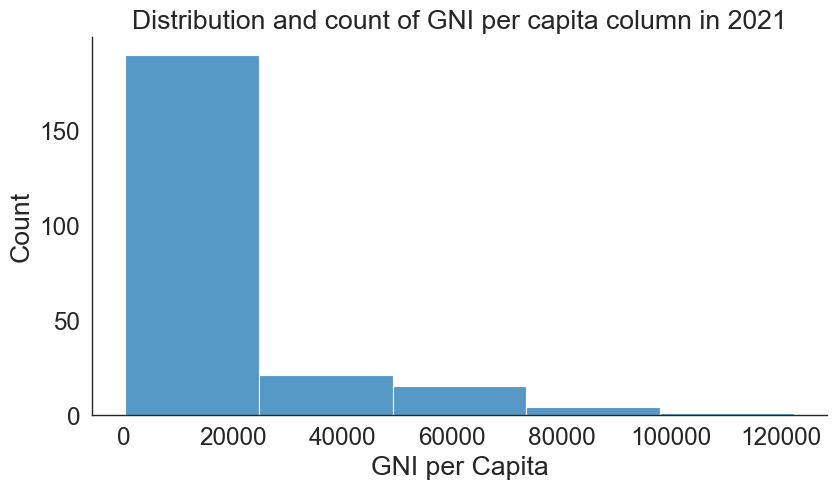

In [562]:
# TODO: Using the dataframe generated from gni_df(), comment on the data structure,
# number of data points, create visualizations, preform some other statistical analysis.
# This is open ended question, get creative!

import seaborn as sns

#Data Exploration and description

df= gni_df()
#Sorting our data by Year and GNI per Capita :
df=df.sort_values(by=['Year','GNI per Capita'],ascending=False)
#Droping Nan values :
df=df.dropna()

#Data Distribution :

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
#Choose the year :
year= 2021
sns.displot(data=df.loc[df.Year == str(year)], x="GNI per Capita", kind="hist", bins = 5, aspect = 1.75)
plt.title('Distribution and count of GNI per capita column in '+str(year))
plt.show()

#Comment
#-------
#We can see that there are a lot entities that are not real countries in the dataset(Like continents),
#and that may affect the quality of the results,so it would be better to delete them and potentialy store them for reuse.
#PS. We can avoid doing it manually by getting a list of all countries or maybe use an API
#and do the intersection with our dataset, but I don't know if it is allowed in that competition
#-------



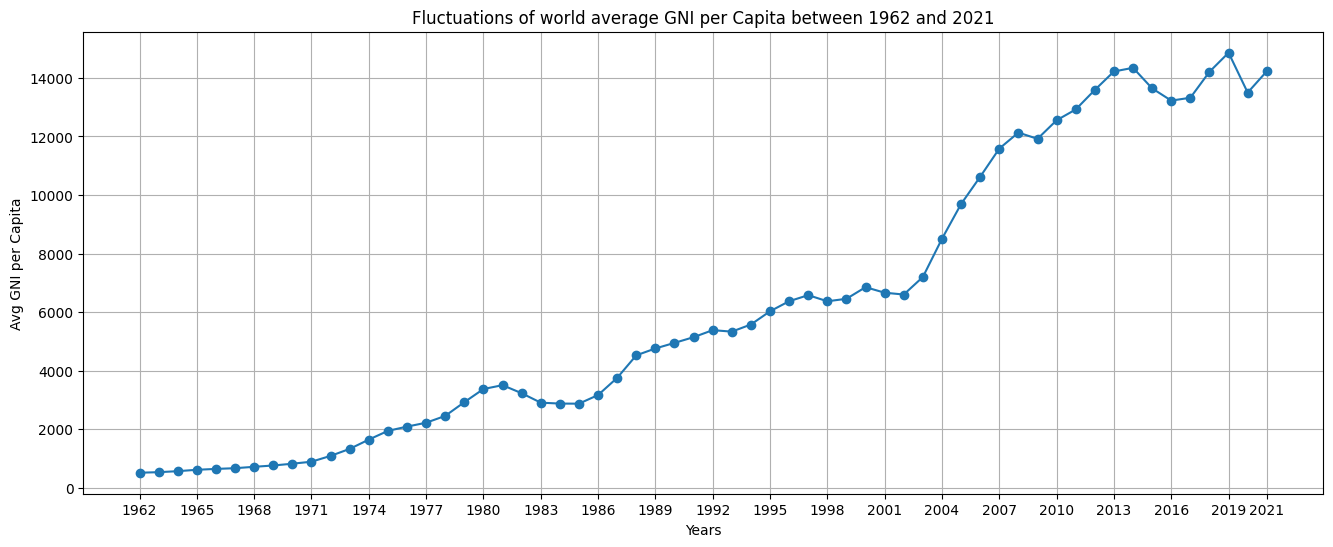

In [474]:
#Data visualisation :
#Connected scatter plot showing the fluctuation of the world average Gni per capita
df1=df.groupby('Year')['GNI per Capita'].mean().reset_index()
plt.figure(figsize=(16, 6))
plt.plot(df1.Year,df1['GNI per Capita'],'-o')
x= np.append(np.arange(int(df1.Year[0]),2021,3).astype(str),'2021')
plt.xticks(x)
plt.title('Fluctuations of world average GNI per Capita between 1962 and 2021')
plt.xlabel("Years")
plt.ylabel("Avg GNI per Capita")
plt.grid()
plt.show()

In [561]:
#Top 3 Countries whith the highest GNI per Capita for the last n years :
n=6
df2=df
#df2.index=(df['Year'])
df2=df2.drop(['Country Code'],axis=1)
df2=df2.sort_values(['Year','GNI per Capita'],ascending= False)
#df2=df2.sort_index(ascending=False)
df2=pd.DataFrame(df2.groupby(['Year','Country Name'],sort=False)['GNI per Capita'].mean())#.nlargest(3,'GNI per Capita')
df2=df2.reset_index('Country Name')
u = df2.index.unique()[:n]
df2=df2.loc[df2.index.isin(u)]
df2=df2.sort_values(['Year','GNI per Capita'],ascending= False)

x=df2.loc[df2.index=='2021'].nlargest(3,'GNI per Capita')
for i in range(1,len(u)) :
    x=pd.concat([x,df2.loc[df2.index==str(u[i])].nlargest(3,'GNI per Capita')])

x=x.reset_index()
x=x.set_index(['Year','Country Name'])
x

GNI per Capita
Year Country Name                
2021 Bermuda             122470.0
     Switzerland          90600.0
     Luxembourg           88190.0
2020 Bermuda             111800.0
     Switzerland          82740.0
     Luxembourg           79580.0
2019 Bermuda             117280.0
     Isle of Man          84580.0
     Switzerland          84250.0
2018 Bermuda             117000.0
     Isle of Man          83960.0
     Switzerland          83270.0
2017 Bermuda             112940.0
     Switzerland          81870.0
     Isle of Man          78840.0
2016 Bermuda             103620.0
     Switzerland          84430.0
     Norway               81370.0

## Section 3
In this section,You will be using the dataframes generated in the last section to preform some supervised learning


Create a new dataset to look like the following containing (Country, Year, Gender, GNI per Capita, and BMI) by merging relevant datasets on Year and Country, and display the shape of the new dataset


```
           Country  Year    GNI per Capita    Gender   BMI
0      Afghanistan  2016           570.0  Both Sexes  23.0 
1      Afghanistan  2016           570.0        Male  22.3 
2      Afghanistan  2016           570.0      Female  23.7 
3      Afghanistan  2015           610.0  Both Sexes  22.9 
4      Afghanistan  2015           610.0        Male  22.3 
...            ...   ...             ...         ...    ...
20911     Zimbabwe  1976           660.0        Male  20.1 
20912     Zimbabwe  1976           660.0      Female  23.5 
20913     Zimbabwe  1975           690.0  Both Sexes  21.8 
20914     Zimbabwe  1975           690.0        Male  20.0 
20915     Zimbabwe  1975           690.0      Female  23.5
```

In [93]:
def new_gni_df() -> pd.DataFrame:
    #Importing the two previous datasets
    df1=bmi_df()
    df2= gni_df()
    #Renaming column so we can join the two dataframes
    df2=df2.rename(columns={'Country Name':'Country'})
    #Joining the two dataframes
    df=pd.merge(df1,df2,on=['Country','Year'])
    #Droping 'Country Code' as we don't need it
    df=df.drop('Country Code',axis=1)
    #Reposition the columns
    df=df.reindex(columns=['Country','Year','Both Sexes','Male','Female','GNI per Capita'])

    #Creating un sub dataframe 'x' so it's easy to stack the Gender column

    # 'x' only contains 'Both Sexes','Male','Female' columns
    x=df.iloc[:,2:-1]
    #Stacking the columns
    x=x.stack()
    #Renaming the columns of 'x' so we can join it with 'df'
    x=x.reset_index().rename(columns={'level_0':'index','level_1':'Gender'})
    #Joining df and x
    df=pd.merge(df.reset_index(),x)
    #Droping unnecessary columns
    df=df.drop(['index','Both Sexes','Male','Female'],axis=1)
    #Renaming the last column to 'BMI'
    df.columns.values[-1]='BMI'
    return df

Build a linear regression model to predict the BMI from GNI per Capita (one feature).

a) Data cleaning: You must drop missing values.

In [94]:
# TODO: You must drop the missing values form the new dataframe
df= new_gni_df()
#Can be used to check which column contains null values
#df.isnull().any()

#Droping null values :
df=df.dropna().reset_index(drop=True)


#Additional cleaning :
#---------------------
#Droping that unwanted value 'No d'
df=df.loc[df['BMI'] != 'No d']
#Transforming all numbers into floats
df['GNI per Capita']=df['GNI per Capita'].astype(float)
df['BMI']=df['BMI'].astype(float)

b) Splitting the dataset into training and test dataset:
- Test dataset: Years [2016, 2015]. The test dataset size must be 960 rows.
- Training dataset: All years except [2016, 2015].

In [95]:
# TODO: Split the datasets into test and training as explained above
expression = (df.Year == '2016') | (df.Year == '2015')

#Test data
test = df.loc[expression].reset_index(drop=True)
#Training data
train = df.loc[~expression].reset_index(drop=True)

Fitting the model on a training dataset to predict BMI.

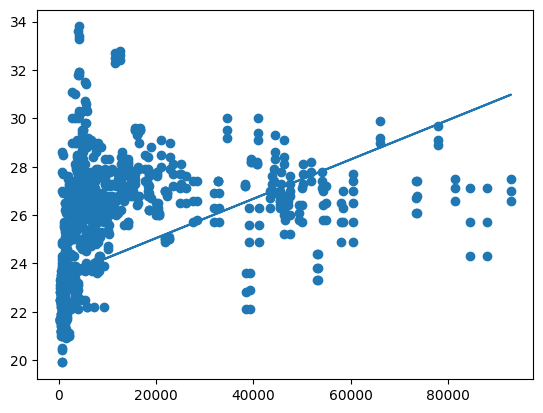

In [112]:
# TODO: Fit the model on a training dataset to predict BMI
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

#Training data
x=train['GNI per Capita']
y=train['BMI']

# Putting data in the right format
x_train=np.array(x).reshape(-1,1)
y_train =np.array(y).reshape(-1,1)

#Testing data
x_test=test['GNI per Capita']
y_test=test['BMI']
            
x_test=np.array(x_test).reshape(-1,1)
y_test =(np.array(y_test).reshape(-1,1))

#Fitting a model to our data
LR.fit(x_train,y_train)

#Predicted Data 
pred= LR.predict(x_test)

#Just to visualize data
plt.scatter(x_test,y_test)
plt.plot(x_test,pred)
plt.show()


Evaluating the model on the test dataset by using the mean absolute error
(MAE).The MAE should be less than 12.

In [113]:
# TODO: Evaluating the model on the test dataset by using the mean absolute error (MAE)

from sklearn.metrics import mean_absolute_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=pred)
mae

2.1966192854198607

## Section 4 (Research Intern Applicants Only)

Select a paper from the following conferences:
- [NeurIPS](https://nips.cc) (Conference on Neural Information Processing Systems)
- [ICML](https://icml.cc) (International Conference on Machine Learning)
- [ACL](https://www.aclweb.org/portal/) (Association for Computational Linguistics)
- [IJCAI](https://www.ijcai.org) (International Joint Conference on Artificial Intelligence)

The paper must be from 2022 and onwards.

Answer the following questions related to the selected paper:

1. Name the research paper you have chosen. Provide a link to the research paper.

`[Answer Here]`

2. Briefly summarize the main arguments, methodologies, and findings of the research paper.


`[Answer Here]`

3. From your perspective, what is the impact and added value from the research paper? what is the novelty?


`[Answer Here]`

4. Critique the methodology used in the paper. Was the research design robust? Are there any weaknesses or areas that could have been improved?


`[Answer Here]`

5. If you were to reproduce this study, what resources would you need? Is there enough information in the paper to reproduce the experiments? What challenges do you anticipate in replicating the results?


`[Answer Here]`

6. How could the results from the paper be applied in a practical setting? Can you suggest a real-world application for the findings in this research?


`[Answer Here]`

7. Can you propose a potential research project that would build on the work done in this paper?


`[Answer Here]`

8. Discuss the statistical methods used in the paper. Were they appropriate? Would you have used a different method? Why or why not?

`[Answer Here]`